In [6]:
import numpy as np
import os
os.chdir('..')

from rss import rSNAPsim
from rss import ProbeVectorFactory as pvf
from rss import PropensityFactory as pff
from rss import TranslationSolvers as tss
from rss import IntensityAnalyses as ia
import matplotlib.pyplot as plt
import time
os.chdir('./interactive_notebooks')
rsim = rSNAPsim()
rsim.open_seq_file('../gene_files/H2B_2tags.txt')

poi = rsim.proteins['1'][0]  #protein object

solver = tss()  #solver class
# solver.colors = 2


poi.tag_epitopes['T_Flag'] = [10,20,30,40,50,60,70]
poi.tag_epitopes['T_Hemagglutinin'] = [300,330,340,350]
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = False

colors = ['#00ff51', '#00f7ff']


solver.protein=poi
t = np.linspace(0,500,501)

C:\Users\willi\Documents\GitHub\rSNAPsim\rss.py:6381: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


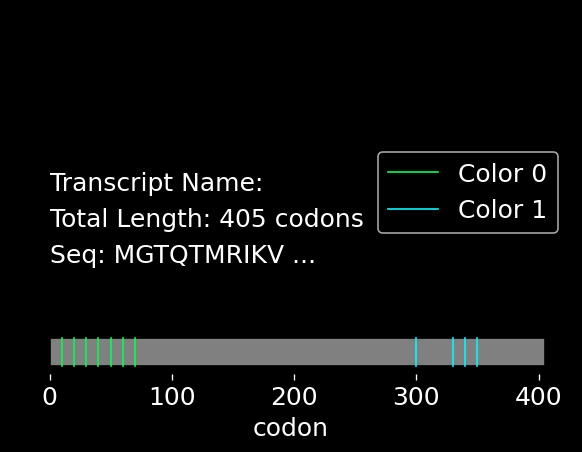

In [7]:
poi.visualize_probe(colors=['#00ff51', '#00f7ff'])


(2, 501, 20)
Low memory, no recording: solved in 0.041018 seconds


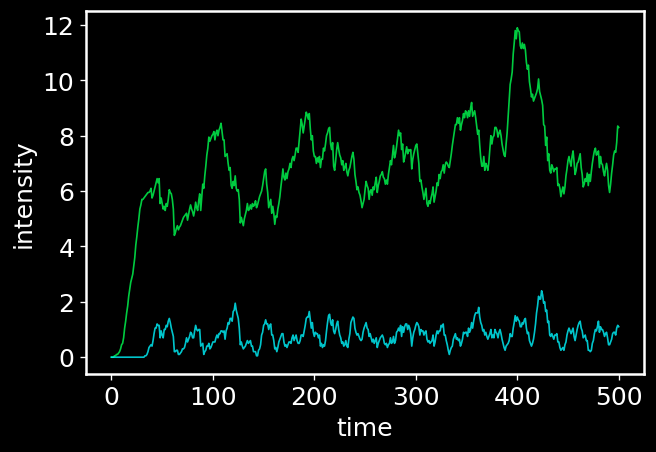

In [8]:
sttime = time.time()
ssa_soln = solver.solve_ssa(poi.kelong,t,ki=.033,n_traj=20)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='#00ff51',alpha=.8)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='#00f7ff',alpha=.8)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)


## Autocovariances with individual means

Text(0, 0.5, 'G(tau)')

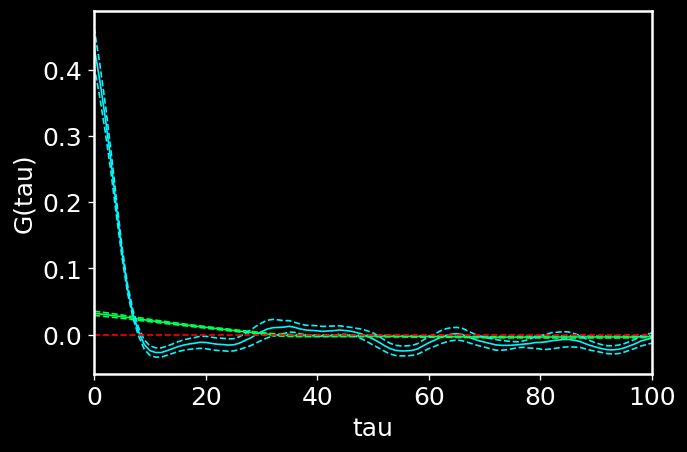

In [10]:
acov,err_acov = ia().get_autocov(ssa_soln.intensity_vec,norm='ind')
plt.plot(np.mean(acov[0],axis=1),color=colors[0]);plt.plot(np.mean(acov[1],axis=1),color=colors[1])
plt.plot(np.mean(acov[0],axis=1) - err_acov[0],'--',color=colors[0]);plt.plot(np.mean(acov[1],axis=1)- err_acov[1],'--',color=colors[1])
plt.plot(np.mean(acov[0],axis=1)+ err_acov[0],'--',color=colors[0]);plt.plot(np.mean(acov[1],axis=1)+ err_acov[1],'--',color=colors[1])
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])
plt.xlabel('tau')
plt.ylabel('G(tau)')

Text(0, 0.5, 'G(tau)')

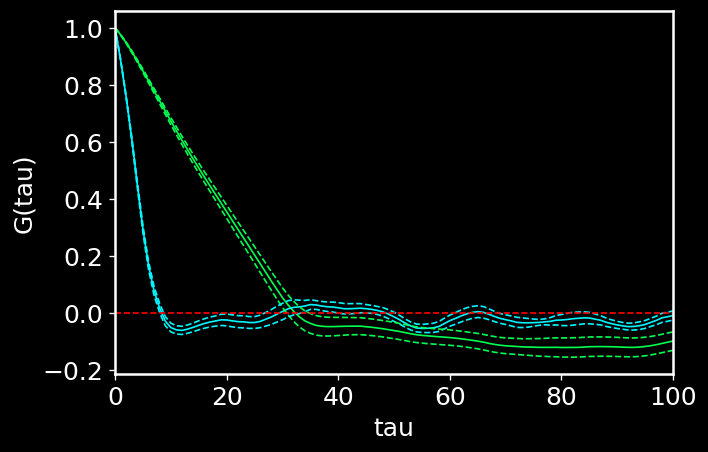

In [14]:
#normalized by G0

acc,acc_err = ia().get_autocorr(acov)
n_traj = acc.shape[-1]

err_acov =  1.0/np.sqrt(n_traj)*np.std(acc,ddof=1,axis=2)


plt.plot(np.mean(acc[0],axis=1),color=colors[0]);plt.plot(np.mean(acc[1],axis=1),color=colors[1])

plt.plot(np.mean(acc[0],axis=1) - err_acov[0],'--',color=colors[0]);plt.plot(np.mean(acc[1],axis=1)- err_acov[1],'--',color=colors[1])
plt.plot(np.mean(acc[0],axis=1)+ err_acov[0],'--',color=colors[0]);plt.plot(np.mean(acc[1],axis=1)+ err_acov[1],'--',color=colors[1])

plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

plt.xlabel('tau')
plt.ylabel('G(tau)')

In [23]:
ssa_soln.__dict__

{'n_traj': 20,
 'k': array([ 0.033     , 14.07718456, 10.55788842,  8.38232354, 21.88362328,
        12.09358128, 14.07718456,  6.65466907, 10.23795241, 20.41191762,
         9.27814437, 13.30933813, 18.55628874, 10.55788842,  6.91061788,
         4.41511698, 25.33893221,  4.41511698, 12.98940212, 11.77364527,
        12.98940212, 13.94921016, 13.30933813, 25.33893221, 17.72445511,
         8.38232354,  2.81543691, 12.98940212, 10.55788842, 10.55788842,
        10.55788842,  2.81543691,  6.65466907,  3.90321936, 12.98940212,
        13.30933813, 20.41191762,  9.79004199,  4.41511698, 20.41191762,
        10.55788842, 13.30933813,  4.41511698, 16.06078784, 12.98940212,
        11.26174765, 20.41191762, 21.88362328,  7.80643871, 12.98940212,
         4.41511698, 18.55628874, 10.55788842, 12.98940212,  8.38232354,
         8.44631074, 18.55628874,  7.29454109, 17.98040392, 12.09358128,
         7.29454109,  7.80643871, 18.55628874, 13.94921016, 10.55788842,
         6.91061788, 17.9804039

## Global means

In [ ]:
acov,err_acov = ia().get_autocov(ssa_soln.intensity_vec,norm='global')
plt.plot(np.mean(acov[0],axis=1),color='seagreen');plt.plot(np.mean(acov[1],axis=1),color='violet')
plt.plot(np.mean(acov[0],axis=1) - err_acov[0],'--',color='seagreen');plt.plot(np.mean(acov[1],axis=1)- err_acov[1],'--',color='violet')
plt.plot(np.mean(acov[0],axis=1)+ err_acov[0],'--',color='seagreen');plt.plot(np.mean(acov[1],axis=1)+ err_acov[1],'--',color='violet')
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

In [ ]:
#normalized by G0

acc = ia().get_autocorr(acov,g0='G1')
plt.plot(np.mean(acc[0],axis=1),color='seagreen');plt.plot(np.mean(acc[1],axis=1),color='violet')
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

## Cross correlations

Text(0, 0.5, 'G(tau)')

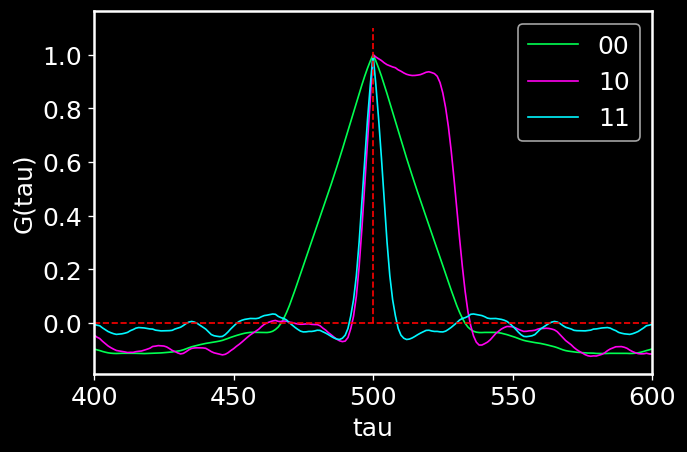

In [19]:
cross_corr,inds = ia().get_crosscorr(ssa_soln.intensity_vec)
plt.figure()

s11_cc = np.mean(cross_corr[0],axis=1)
s12_cc = np.mean(cross_corr[1],axis=1)
s21_cc = np.mean(cross_corr[2],axis=1)
s22_cc = np.mean(cross_corr[3],axis=1)

plt.plot(s11_cc/s11_cc[500],color=colors[0] ); plt.plot(s21_cc/s21_cc[500],color='#ff00ee');
plt.plot(s22_cc/s22_cc[500],color=colors[1]);
plt.plot([500,500],[0,1.1],'r--')
plt.plot([400,600],[0,0],'r--')

plt.legend(['00','10','11' ])
plt.xlim([400,600])
plt.xlabel('tau')
plt.ylabel('G(tau)')